# EDA

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('crop_yield_data.csv')
df.sample(10)

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
2031,501,1,759,9,1175,419
2200,1996,7,132,6,2052,180
71,1604,6,780,4,957,468
205,1791,8,841,10,1512,519
753,949,5,555,9,1856,352
1546,1872,5,216,6,502,183
1319,1787,9,526,10,1641,366
417,649,10,265,4,1386,198
1076,769,8,535,9,2163,349
1288,613,3,625,12,2059,377


In [156]:
len(df)

3000

In [157]:
df.isnull().sum()

rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


In [159]:
df.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333,328.099000
std,432.371756,2.855172,287.122742,2.621501,814.326919,145.036503
min,500.000000,1.000000,10.000000,4.000000,100.000000,46.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000,199.000000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000,332.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000,455.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000,628.000000


In [160]:
for i, col in enumerate(df.columns):
    print(i//3, i%3)

0 0
0 1
0 2
1 0
1 1
1 2


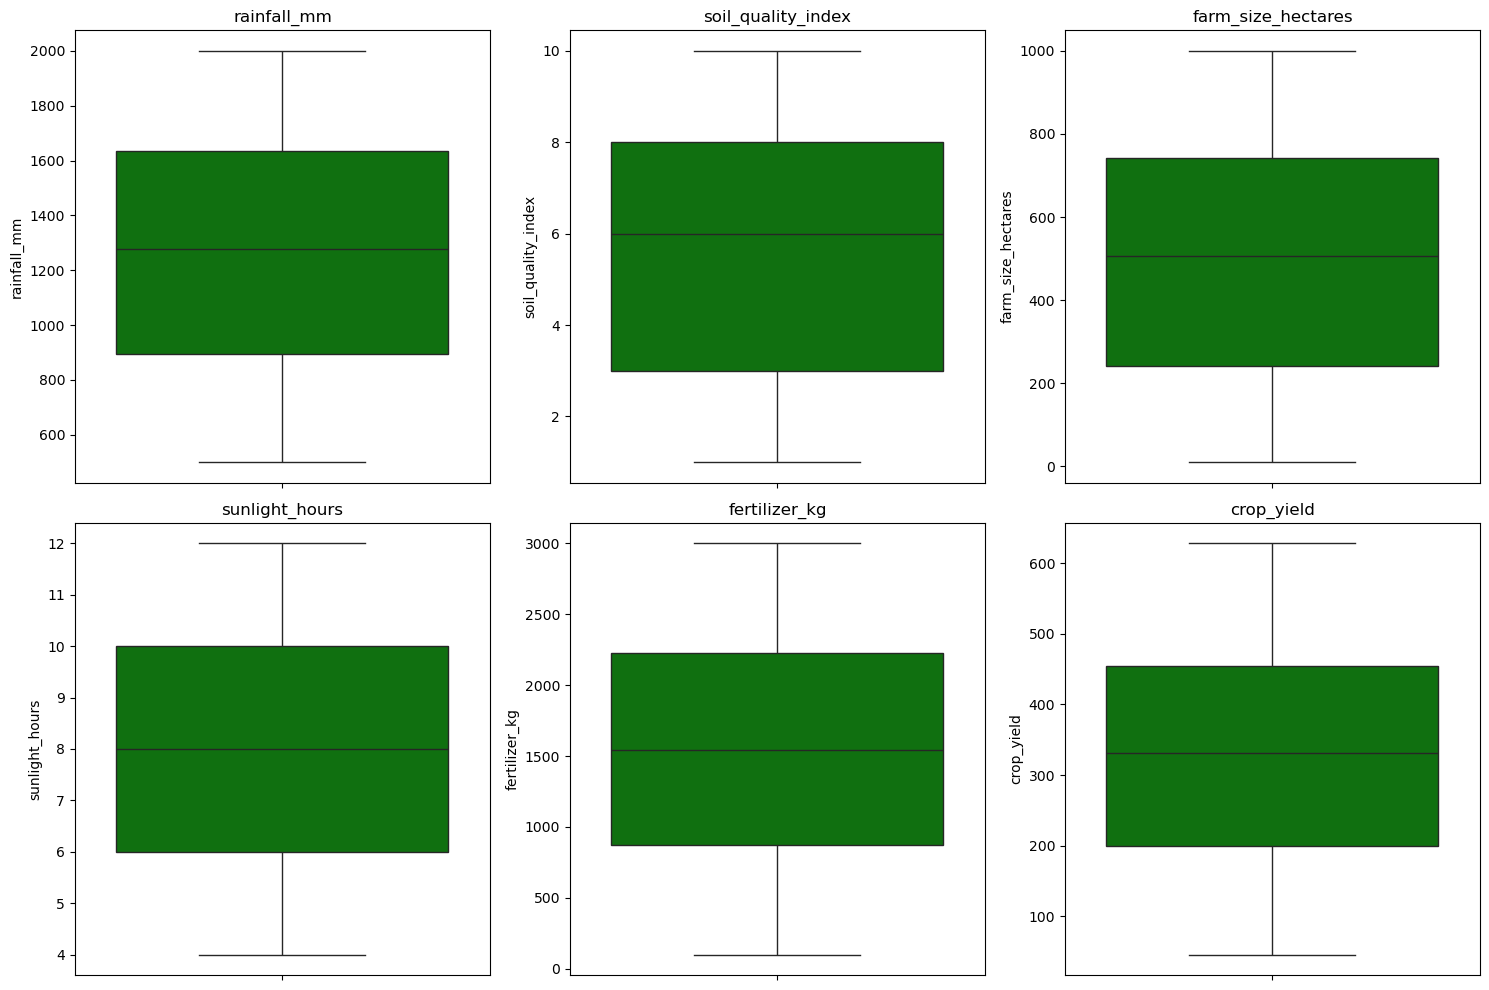

In [161]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=ax[i//3, i%3], color = 'g')
    ax[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()

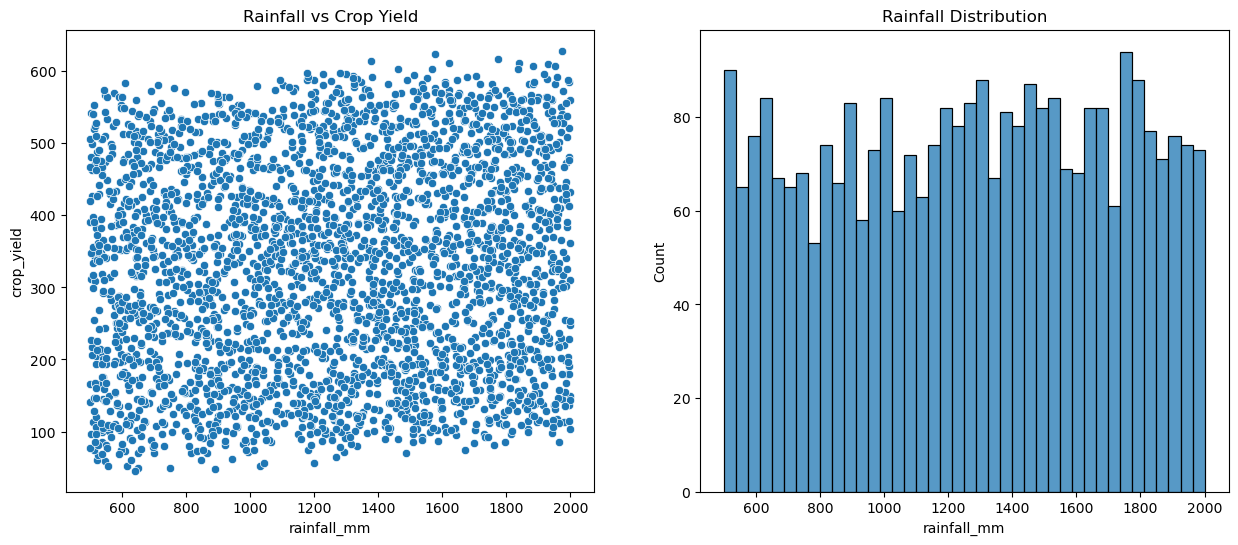

In [162]:
f, ax = plt.subplots(1,2 , figsize=(15, 6))
sns.scatterplot(x='rainfall_mm', y='crop_yield', data=df, ax=ax[0])
ax[0].set_title('Rainfall vs Crop Yield')

sns.histplot(df['rainfall_mm'], bins = 40, ax=ax[1])
ax[1].set_title('Rainfall Distribution')

plt.show()

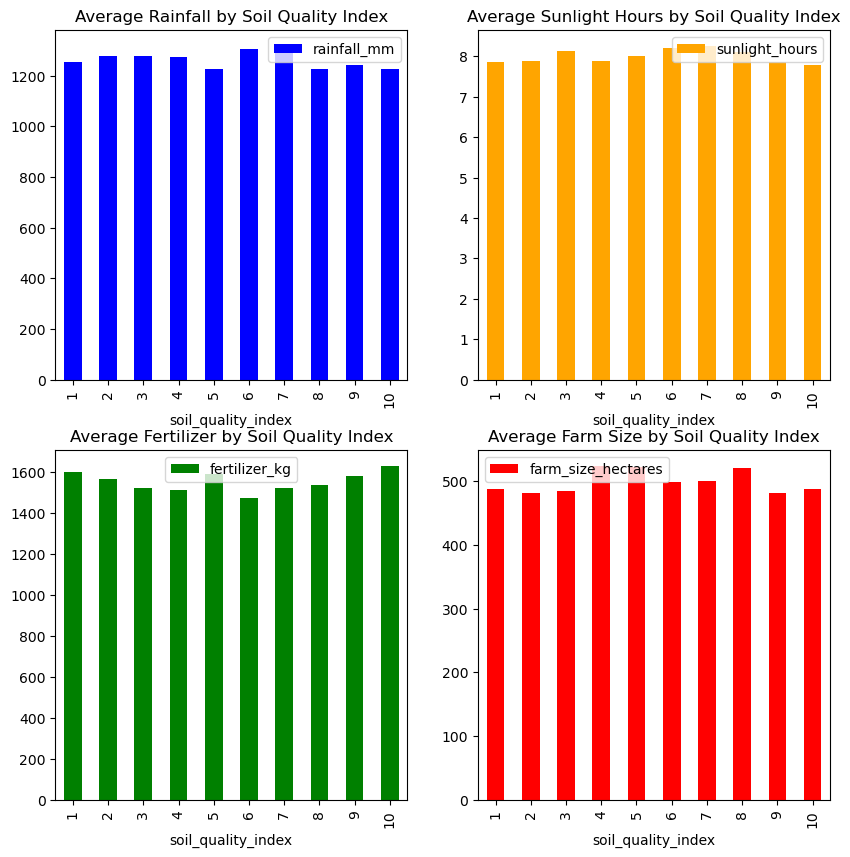

In [163]:
f, ax = plt.subplots(2,2 , figsize=(10, 10))

# Group by soil_quality_index and calculate the mean of rainfall_mm
grouped_df = df.groupby('soil_quality_index')[['rainfall_mm', 'sunlight_hours', 'fertilizer_kg', 'farm_size_hectares']].mean().reset_index()


# Plot the grouped data
grouped_df.plot(x='soil_quality_index', y='rainfall_mm', kind='bar', ax=ax[0,0], color='blue')
grouped_df.plot(x='soil_quality_index', y='sunlight_hours', kind='bar', ax=ax[0, 1], color='orange')
grouped_df.plot(x='soil_quality_index', y='fertilizer_kg', kind='bar', ax=ax[1, 0], color='green')
grouped_df.plot(x='soil_quality_index', y='farm_size_hectares', kind='bar', ax=ax[1, 1], color='red')
ax[0,0].set_title('Average Rainfall by Soil Quality Index')
ax[0,1].set_title('Average Sunlight Hours by Soil Quality Index')
ax[1,0].set_title('Average Fertilizer by Soil Quality Index')
ax[1,1].set_title('Average Farm Size by Soil Quality Index')

plt.show()

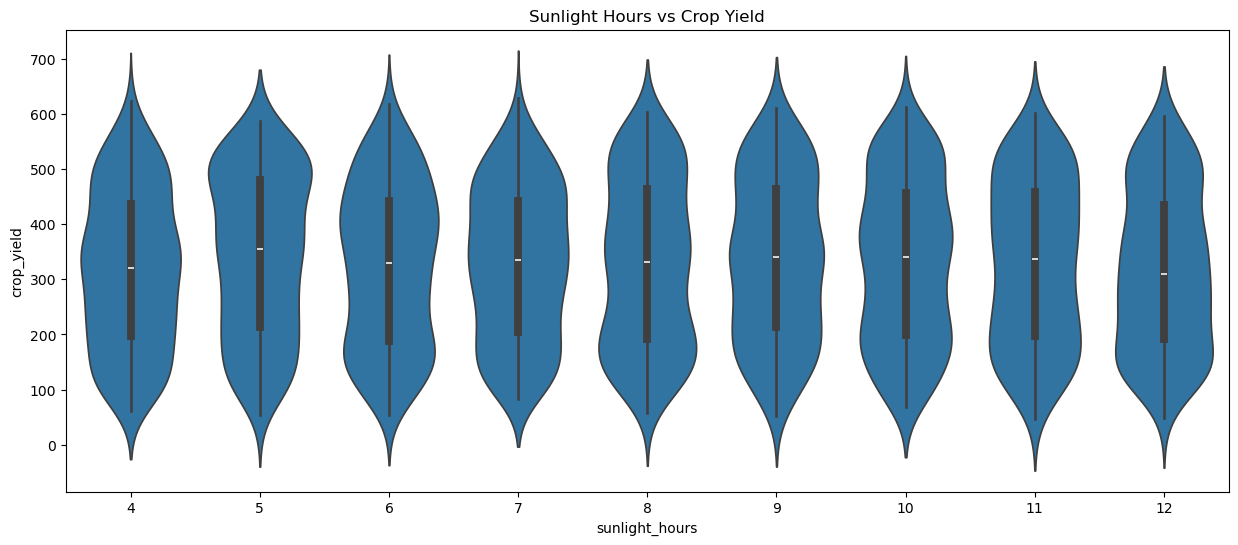

In [164]:
plt.figure(figsize = (15,6))
sns.violinplot(x='sunlight_hours', y='crop_yield', data=df)
plt.title('Sunlight Hours vs Crop Yield')
plt.show()

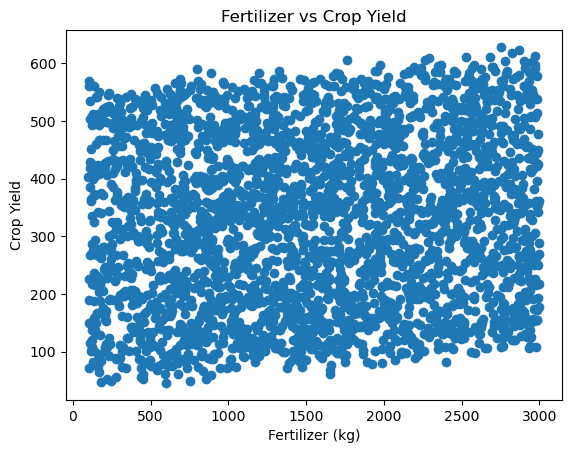

In [165]:
plt.scatter(df['fertilizer_kg'], df['crop_yield'])
plt.xlabel('Fertilizer (kg)')
plt.ylabel('Crop Yield')
plt.title('Fertilizer vs Crop Yield')
plt.show()

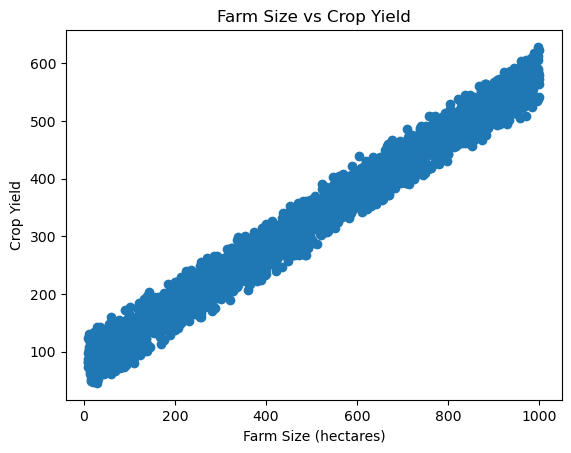

In [166]:
plt.scatter(df['farm_size_hectares'], df['crop_yield'])
plt.xlabel('Farm Size (hectares)')  
plt.ylabel('Crop Yield')
plt.title('Farm Size vs Crop Yield')
plt.show()

<Axes: >

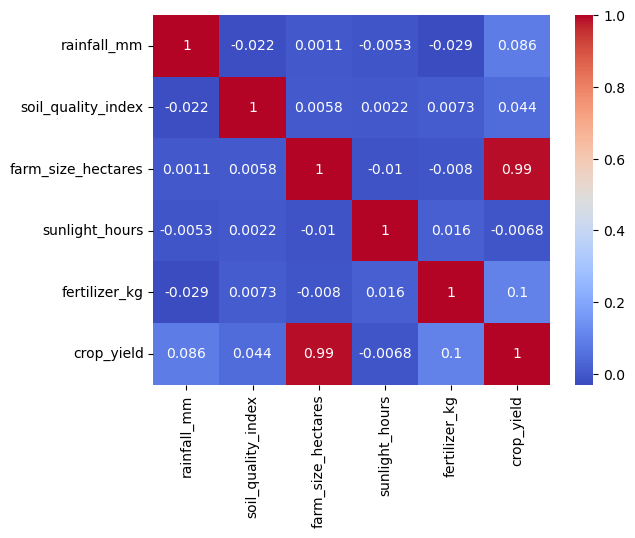

In [167]:
s = df.corr()
sns.heatmap(s, annot=True, cmap='coolwarm')

# Machine Learning

## import libraries

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#### function to evaluate the model.

In [230]:
def plot_pred_real(y_test, y_pred, sample):
    print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('R2: {:.3f}'.format(r2_score(y_test, y_pred)))
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values[:sample], 'o', label='Real', ms = 15)
    plt.plot(y_pred[:sample], '*', label='Predicted')
    plt.legend()
    plt.show()

#### Transform the Input (Preprocessing)

In [233]:
df

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
...,...,...,...,...,...,...
2995,1483,9,78,12,2739,155
2996,804,9,481,4,1898,319
2997,870,1,113,7,2282,129
2998,1352,6,767,11,2901,493


In [235]:
df['crop_yield']

0       404
1       115
2       231
3       537
4       554
       ... 
2995    155
2996    319
2997    129
2998    493
2999    134
Name: crop_yield, Length: 3000, dtype: int64

In [237]:
train = df.drop('crop_yield', axis=1)
test = df['crop_yield']

train = StandardScaler().fit_transform(train)

In [239]:
train

array([[ 0.83947551,  1.22371468,  0.4779206 ,  1.14635365, -0.66747263],
       [ 1.60977447,  1.22371468, -1.48324017,  1.14635365, -1.76549483],
       [ 0.22416162, -1.57868535, -0.51136831, -1.14279276, -1.04084931],
       ...,
       [-0.90931132, -1.57868535, -1.3439037 , -0.37974395,  0.89972684],
       [ 0.20565594,  0.17281467,  0.93424752,  1.14635365,  1.65999054],
       [-0.87923959,  0.52311467, -1.14534924,  1.14635365, -1.30737148]])

In [241]:
len(train)

3000

#### Split the Dataset

In [244]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

#### Train the Model

RMSE: 0.286
R2: 1.000


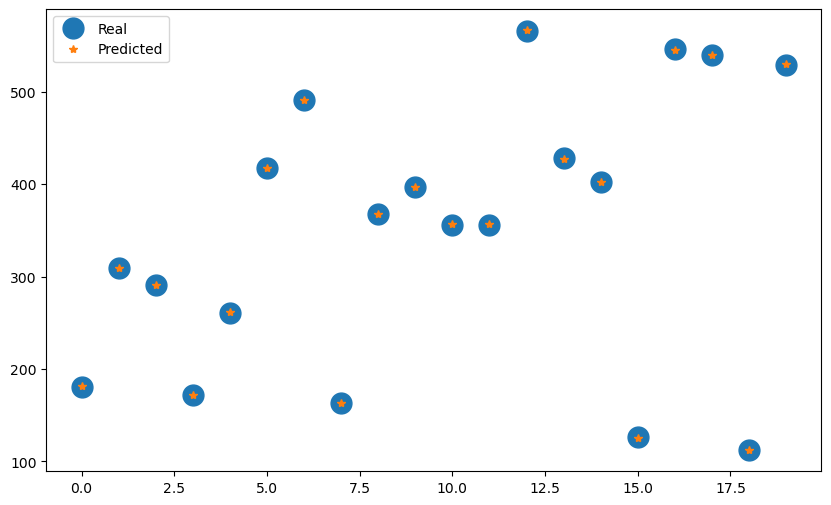

In [247]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_pred_real(y_test, y_pred, 20)